In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


from sklearn.preprocessing import OneHotEncoder

In [2]:
df=pd.read_csv("C:\\Users\\rakes\\Downloads\\insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
X = df.drop('expenses', axis=1)
y = df['expenses']

In [4]:
import pandas as pd


# Convert nominal features to numerical (if not already done)
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})


# Confirm data types and look at the first few rows
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB
None
   age  sex   bmi  children  smoker     region  expenses
0   19    1  27.9         0       1  southwest  16884.92
1   18    0  33.8         1       0  southeast   1725.55
2   28    0  33.0         3       0  southeast   4449.46
3   33    0  22.7         0       0  northwest  21984.47
4   32    0  28.9         0       0  northwest   3866.86


In [5]:
# Apply one-hot encoding to the 'region' column
# data = pd.get_dummies(df, columns=['region'], drop_first=True)

In [6]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'region' column
df['region'] = label_encoder.fit_transform(df['region'])

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,3,16884.92
1,18,0,33.8,1,0,2,1725.55
2,28,0,33.0,3,0,2,4449.46
3,33,0,22.7,0,0,1,21984.47
4,32,0,28.9,0,0,1,3866.86


In [8]:
df['region'].describe()

count    1338.000000
mean        1.515695
std         1.104885
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: region, dtype: float64

In [9]:
df['region'].nunique()

4

In [10]:
df.shape

(1338, 7)

In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [13]:
df.duplicated().sum()

np.int64(1)

In [14]:
duplicated_rows = df[df.duplicated()]
print("Duplicated rows:")
print(duplicated_rows)

Duplicated rows:
     age  sex   bmi  children  smoker  region  expenses
581   19    0  30.6         0       0       1   1639.56


In [15]:
df=df.drop_duplicates()
print(df)

      age  sex   bmi  children  smoker  region  expenses
0      19    1  27.9         0       1       3  16884.92
1      18    0  33.8         1       0       2   1725.55
2      28    0  33.0         3       0       2   4449.46
3      33    0  22.7         0       0       1  21984.47
4      32    0  28.9         0       0       1   3866.86
...   ...  ...   ...       ...     ...     ...       ...
1333   50    0  31.0         3       0       1  10600.55
1334   18    1  31.9         0       0       0   2205.98
1335   18    1  36.9         0       0       2   1629.83
1336   21    1  25.8         0       0       3   2007.95
1337   61    1  29.1         0       1       1  29141.36

[1337 rows x 7 columns]


In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.describe()

,age,sex,bmi,children,smoker,region,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.495138,30.665520,1.095737,0.204936,1.516081,13279.121638
std,14.044333,0.500163,6.100664,1.205571,0.403806,1.105208,12110.359657
min,18.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,1.000000,4746.340000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9386.160000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.720000
max,64.000000,1.000000,53.100000,5.000000,1.000000,3.000000,63770.430000


<Axes: ylabel='bmi'>

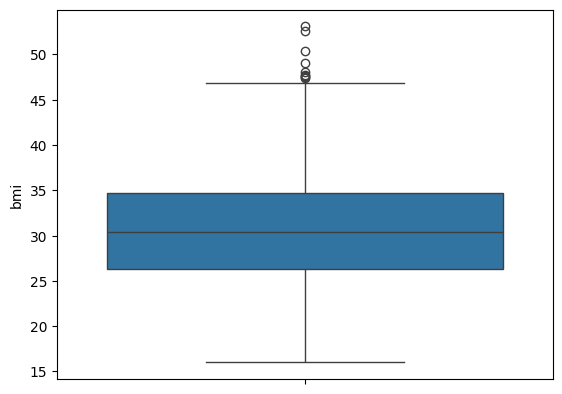

In [18]:
sns.boxplot(df['bmi'])

In [19]:
#finding outlier
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1


In [20]:
# Define outliers as points outside of 1.5 * IQR from Q1 and Q3
outliers_iqr = df[(df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))]
print("Outliers identified by IQR:\n", outliers_iqr)

Outliers identified by IQR:
       age  sex   bmi  children  smoker  region  expenses
116    58    0  49.1         0       0       2  11381.33
286    46    1  48.1         2       0       0   9432.93
401    47    0  47.5         1       0       2   8083.92
543    54    1  47.4         0       1       2  63770.43
847    23    0  50.4         1       0       2   2438.06
860    37    1  47.6         2       1       3  46113.51
1047   22    0  52.6         1       1       2  44501.40
1088   52    0  47.7         1       0       2   9748.91
1317   18    0  53.1         0       0       2   1163.46


In [21]:
# Cap the outliers at the 5th and 95th percentile
cap_low, cap_high = df['bmi'].quantile([0.05, 0.95])

df['bmi_capped'] = np.where(df['bmi'] < cap_low, cap_low,
                                 np.where(df['bmi'] > cap_high, cap_high, df['bmi']))
print("Data with outliers capped:\n", df[['bmi', 'bmi_capped']])



Data with outliers capped:
        bmi  bmi_capped
0     27.9        27.9
1     33.8        33.8
2     33.0        33.0
3     22.7        22.7
4     28.9        28.9
...    ...         ...
1333  31.0        31.0
1334  31.9        31.9
1335  36.9        36.9
1336  25.8        25.8
1337  29.1        29.1

[1337 rows x 2 columns]


C:\Users\rakes\AppData\Local\Temp\ipykernel_20012\497766306.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi_capped'] = np.where(df['bmi'] < cap_low, cap_low,


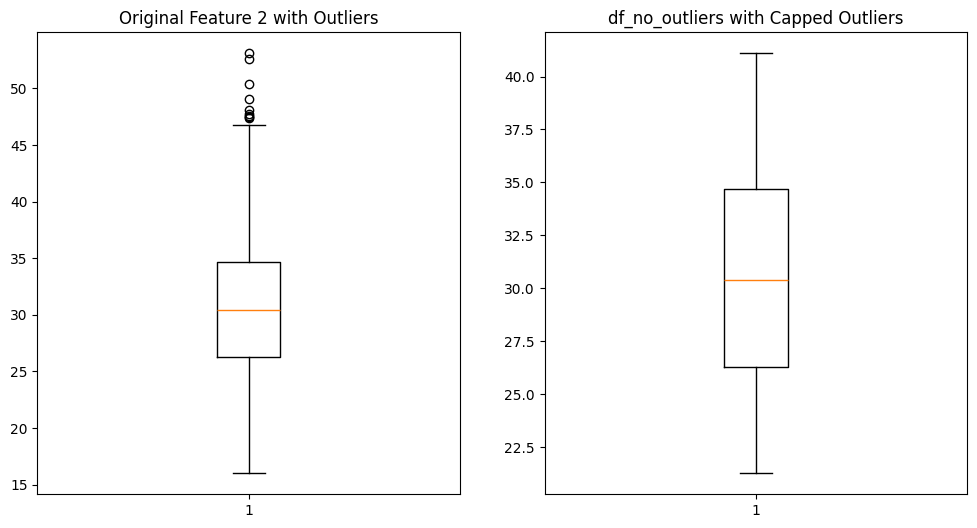

In [22]:
import matplotlib.pyplot as plt

# Before and after outlier handling
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original data with outliers
axes[0].boxplot(df['bmi'])
axes[0].set_title('Original Feature 2 with Outliers')

# Data after capping outliers
axes[1].boxplot(df['bmi_capped'])
axes[1].set_title('df_no_outliers with Capped Outliers')

plt.show()


<Axes: ylabel='age'>

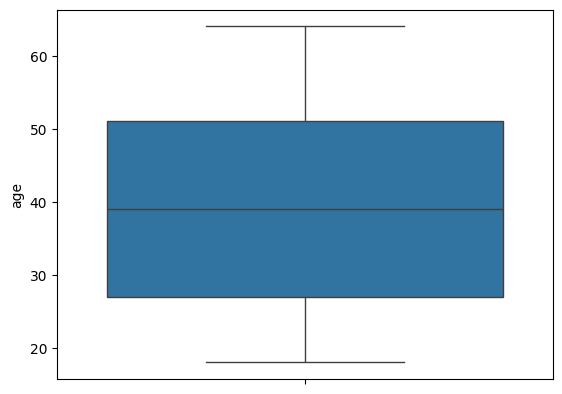

In [23]:
sns.boxplot(df['age'])

# Data Visualization
-- Scatter plot

<Axes: xlabel='age', ylabel='Count'>

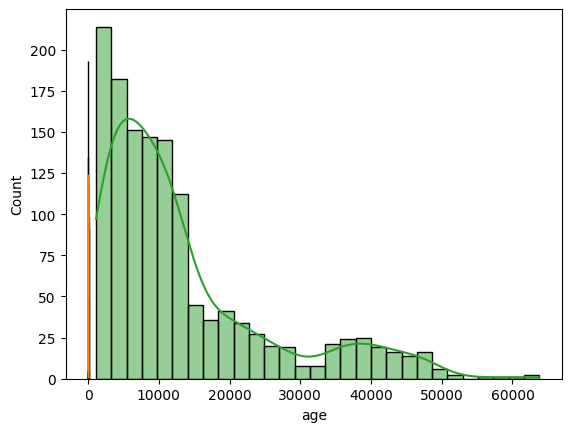

In [24]:
#Numerical Columns:
#Histograms: Examine distributions for continuous variables (age, bmi, expenses).
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['age'], kde=True)
sns.histplot(df['bmi'], kde=True)
sns.histplot(df['expenses'], kde=True)


<Axes: xlabel='bmi', ylabel='Count'>

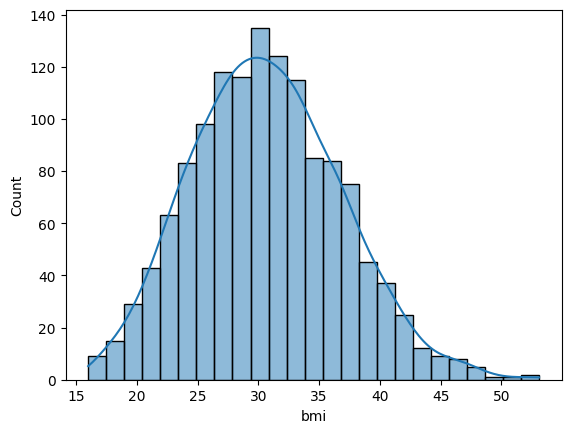

In [25]:
sns.histplot(df['bmi'], kde=True)

<Axes: xlabel='expenses', ylabel='Count'>

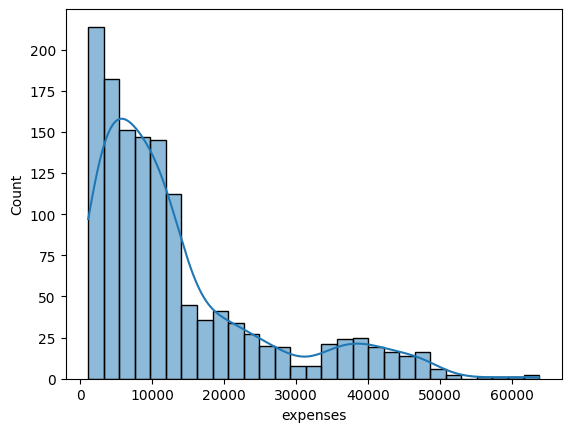

In [26]:
sns.histplot(df['expenses'], kde=True)

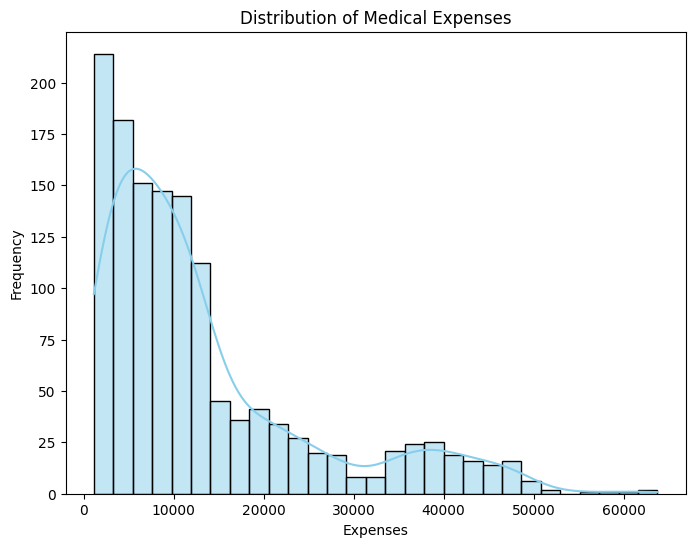

In [27]:
# Distribution of expenses
plt.figure(figsize=(8, 6))
sns.histplot(df['expenses'], kde=True, color='skyblue')
plt.title("Distribution of Medical Expenses")
plt.xlabel("Expenses")
plt.ylabel("Frequency")
plt.show()


<Axes: xlabel='age', ylabel='Count'>

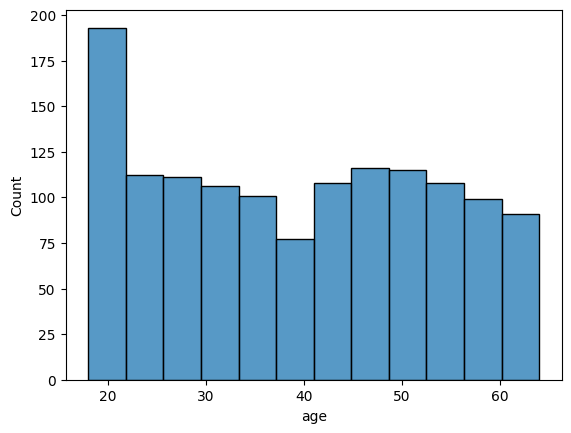

In [28]:
sns.histplot(data=df, x='age')  # Incorrect if column name is 'Age'


<Axes: xlabel='sex', ylabel='count'>

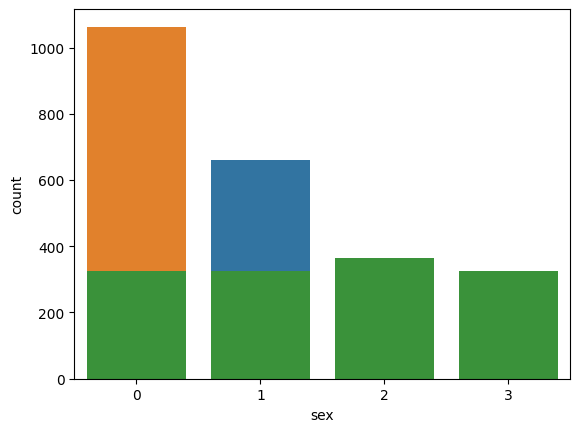

In [29]:
#Categorical Columns:
#Count Plots: Useful for categorical variables like sex, smoker, region, and childre
sns.countplot(x='sex',data=df)
sns.countplot(x='smoker', data=df)
sns.countplot(x='region', data=df)


<Axes: >

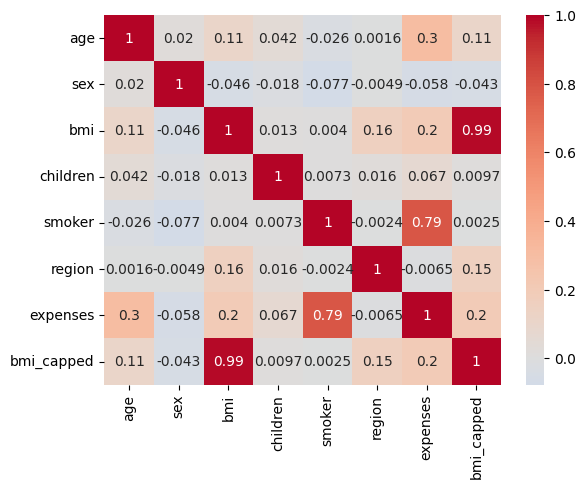

In [30]:
#Analyze the relationships between the target variable (expenses) and other features:


#Correlation Matrix:
import numpy as np
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)


<Axes: xlabel='age', ylabel='expenses'>

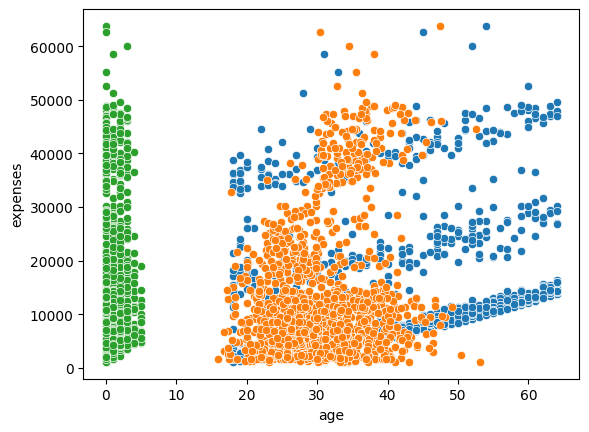

In [31]:
#Scatter Plots:

#Age vs. expenses: Examine if charges increase with age.
#BMI vs. expenses: High BMI might correlate with higher charges.
#Children vs. expenses: Check if having more children affects insurance costs.

sns.scatterplot(x='age', y='expenses', data=df)
sns.scatterplot(x='bmi', y='expenses', data=df)
sns.scatterplot(x='children', y='expenses', data=df)


<Axes: xlabel='bmi', ylabel='expenses'>

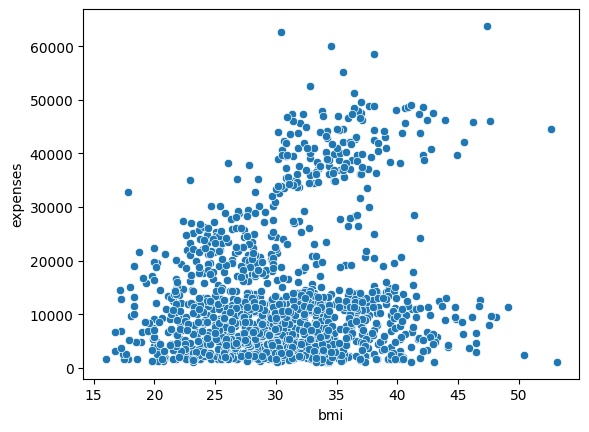

In [32]:
sns.scatterplot(x='bmi', y='expenses', data=df)

In [33]:
# Multicollinearity Check
#Before building a regression model, check for multicollinearity among features:
#Calculate VIF for each feature. A VIF > 5 indicates multicollinearity issues.
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['age', 'bmi', 'children']]  # Example subset of features
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]


In [34]:
df

,age,sex,bmi,children,smoker,region,expenses,bmi_capped
0,19,1,27.9,0,1,3,16884.92,27.9
1,18,0,33.8,1,0,2,1725.55,33.8
2,28,0,33.0,3,0,2,4449.46,33.0
3,33,0,22.7,0,0,1,21984.47,22.7
4,32,0,28.9,0,0,1,3866.86,28.9
...,...,...,...,...,...,...,...,...
1333,50,0,31.0,3,0,1,10600.55,31.0
1334,18,1,31.9,0,0,0,2205.98,31.9
1335,18,1,36.9,0,0,2,1629.83,36.9
1336,21,1,25.8,0,0,3,2007.95,25.8


In [35]:
df.drop('bmi', axis=1,inplace=True)

C:\Users\rakes\AppData\Local\Temp\ipykernel_20012\1323944663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('bmi', axis=1,inplace=True)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1337 non-null   int64  
 1   sex         1337 non-null   int64  
 2   children    1337 non-null   int64  
 3   smoker      1337 non-null   int64  
 4   region      1337 non-null   int64  
 5   expenses    1337 non-null   float64
 6   bmi_capped  1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


In [37]:
df['bmi_capped'].describe()

count    1337.000000
mean       30.614974
std         5.587423
min        21.260000
25%        26.300000
50%        30.400000
75%        34.700000
max        41.100000
Name: bmi_capped, dtype: float64

In [38]:
df.head()

,age,sex,children,smoker,region,expenses,bmi_capped
0,19,1,0,1,3,16884.92,27.9
1,18,0,1,0,2,1725.55,33.8
2,28,0,3,0,2,4449.46,33.0
3,33,0,0,0,1,21984.47,22.7
4,32,0,0,0,1,3866.86,28.9


In [39]:
# Assuming 'df' is your DataFrame
df.to_csv('expenses1.csv', index=False)


# Feature Engineering
Encoding Categorical Variables:

In [40]:
from sklearn.preprocessing import StandardScaler
X = df.drop('expenses', axis=1)
y = df['expenses']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [41]:
X_scaled

array([[-1.44041773,  1.00977099, -0.90923416,  1.96966039,  1.34316271,
        -0.48608983],
       [-1.51164747, -0.99032355, -0.07944162, -0.50770174,  0.43801727,
         0.57024817],
       [-0.79935006, -0.99032355,  1.58014347, -0.50770174,  0.43801727,
         0.42701589],
       ...,
       [-1.51164747,  1.00977099, -0.90923416, -0.50770174,  0.43801727,
         1.12527322],
       [-1.29795825,  1.00977099, -0.90923416, -0.50770174,  1.34316271,
        -0.86207454],
       [ 1.55123139,  1.00977099, -0.90923416,  1.96966039, -0.46712816,
        -0.27124143]])

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [43]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# model prediction and Evaluation¶

In [44]:
# Predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 4205.211453518456
RMSE: 5962.902051474297
R2 Score: 0.806503256379071


In [45]:
# Print feature coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


            Coefficient
age         3475.216678
sex           37.394735
children     644.920491
smoker      9302.379580
region      -264.738377
bmi_capped  1960.281779


In [46]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

# Model Evaluation

In [47]:
y_pred_rf = rf_model.predict(X_test)

# Evaluation

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {rf_mse}, R2: {rf_r2}')


Random Forest MSE: 18038593.425411623, R2: 0.9018340260945473


# DecisionTreeRegressor

In [48]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42, max_depth=5)  # Adjust max_depth as needed

# Train the model
tree_regressor.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

# Model Predictions

In [49]:
# Predict on the test set
y_pred = tree_regressor.predict(X_test)


# Model Evaluation

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 19833677.239684097
Root Mean Squared Error (RMSE): 4453.501682910212
R-squared (R²): 0.8920651851037786


# Save File

In [51]:
import pickle
# Save the model to a file
with open("RandomForestRegressor.pkl", "wb") as f:
    pickle.dump(rf_model, f)

In [52]:
import streamlit as st
import pickle
import numpy as np

# Load the trained model
with open("RandomForestRegressor.pkl", "rb") as file:
    model = pickle.load(file)

def predict_insurance(age, sex, bmi, children, smoker, region):
    # Prepare input
    input_data = pd.DataFrame({
        "age": [age],
        "sex": [sex],
        "bmi": [bmi],
        "children": [children],
        "smoker": [smoker],
        "region": [region]
    })

    # Predict
    prediction = model.predict(input_data)
    return prediction[0]

# Streamlit UI
st.title("Insurance Cost Prediction")
st.write("Enter details to predict the insurance cost.")

# Input fields
age = st.slider("Age", 18, 100, 30)
sex = st.selectbox("Sex", ["male", "female"])
bmi = st.number_input("BMI", min_value=10.0, max_value=50.0, value=25.0)
children = st.number_input("Number of Children", min_value=0, max_value=10, value=0)
smoker = st.selectbox("Smoker", ["yes", "no"])
region = st.selectbox("Region", ["northeast", "northwest", "southeast", "southwest"])

# Prediction button
if st.button("Predict"):
    result = predict_insurance(age, sex, bmi, children, smoker, region)
    st.success(f"The predicted insurance cost is: ${result:.2f}")


2024-11-21 23:25:36.835 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-21 23:25:37.802 
  command:

    streamlit run C:\Users\rakes\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-21 23:25:37.805 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-21 23:25:37.805 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-21 23:25:37.805 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-21 23:25:37.805 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-21 23:25:37.808 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-21 23:25:37.809 Thre